# HW3 CONVOLUTIONAL NEURAL NETWORKS - IMAGE CLASSIFICATION (GAME OF THRONES DATASET) - ADITYA TORNEKAR


In [40]:
#Unzipping the image zip file renamed as GameOfThrones.zip
!unzip GameOfThrones.zip

Path changes might be required as per unzipped folder path to reach to the dataset folder which consists of test and train directory

Below path is used as this code was built on Google Colab which has the below directory structure

In [2]:
import os
print(os.listdir('/content/dataset'))

['test', 'train']


In [3]:
#Importing Libraries
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# CNN libraries
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [4]:
#Defining directories and lists to consume images
X=[]
Z=[]
IMG_SIZE=150
JAIMIE_DIR='/content/dataset/train/Jaimie'
TYRION_DIR='/content/dataset/train/Tyrion'
ARYA_DIR='/content/dataset/train/arya'
CERSIE_DIR='/content/dataset/train/cersie'
DANERYS_DIR='/content/dataset/train/danerys'
JOHN_DIR='/content/dataset/train/john'
NED_DIR='/content/dataset/train/ned stark'
PETER_DIR='/content/dataset/train/peter baelish'
SANSA_DIR='/content/dataset/train/sansa'

In [5]:
#Defining functions to read directory and assign label accordingly
def assign_label(img,got_type):
    return got_type

def make_train_data(got_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,got_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
#Calling functions to assign labels as per image directories
make_train_data('Jaimie',JAIMIE_DIR)
print(len(X))

make_train_data('Tyrion',TYRION_DIR)
print(len(X))

make_train_data('Arya',ARYA_DIR)
print(len(X))

make_train_data('Cersie',CERSIE_DIR)
print(len(X))

make_train_data('Danerys',DANERYS_DIR)
print(len(X))

make_train_data('John',JOHN_DIR)
print(len(X))

make_train_data('Ned',NED_DIR)
print(len(X))

make_train_data('Peter',PETER_DIR)
print(len(X))

make_train_data('Sansa',SANSA_DIR)
print(len(X))

  0%|          | 0/73 [00:00<?, ?it/s]

63
126
223
304
374
430


100%|██████████| 103/103 [00:00<00:00, 2148.30it/s]

503
560
663


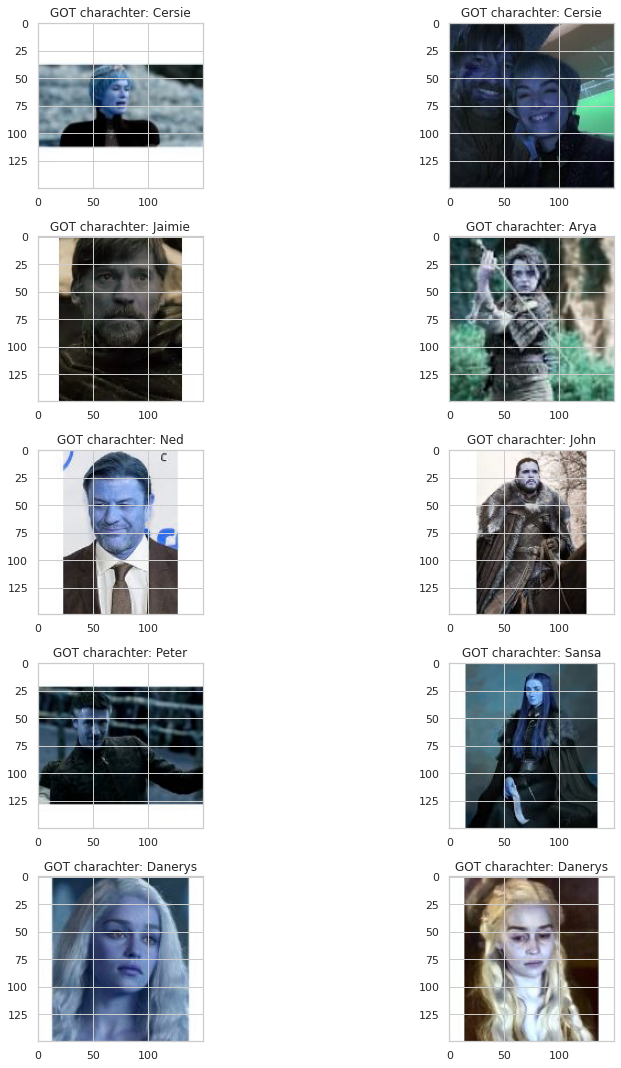

In [7]:
#Ploting images to check the data has been read correctly
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('GOT charachter: '+Z[l])
        
plt.tight_layout()

In [8]:
#Assigning numerical values to categorical labels
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,9)
X=np.array(X)
X=X/255

In [9]:
#Spltting train dataset into train and validation 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=15)

In [10]:
#Building CNN model
np.random.seed(15)
rn.seed(15)
tf.random.set_seed(15)

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(9, activation = "softmax"))

After testing multiple configurations, the above model configuration further gave decent results after adding dropout and adjusting filters. We can also use Gridsearch for tuning the hyperparameters.

In [11]:
#Data generator - Data Augumentation
imagedatagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False) 


imagedatagen.fit(x_train)

The above data augumentation process is performed to reduce the overfitting

In [12]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        5

In [22]:
batch_size=128
epochs=100

In [23]:
History = model.fit(imagedatagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/100
3/3 [==============================] - 15s 5s/step - loss: 1.8575 - accuracy: 0.3008 - val_loss: 1.9916 - val_accuracy: 0.2892
Epoch 2/100
3/3 [==============================] - 15s 5s/step - loss: 1.9060 - accuracy: 0.2760 - val_loss: 1.9683 - val_accuracy: 0.3133
Epoch 3/100
3/3 [==============================] - 14s 5s/step - loss: 1.8611 - accuracy: 0.3415 - val_loss: 1.9446 - val_accuracy: 0.3193
Epoch 4/100
3/3 [==============================] - 14s 5s/step - loss: 1.8501 - accuracy: 0.3252 - val_loss: 1.9538 - val_accuracy: 0.2892
Epoch 5/100
3/3 [==============================] - 15s 5s/step - loss: 1.8302 - accuracy: 0.3252 - val_loss: 1.9590 - val_accuracy: 0.2892
Epoch 6/100
3/3 [==============================] - 14s 5s/step - loss: 1.8199 - accuracy: 0.3279 - val_loss: 2.0214 - val_accuracy: 0.2831
Epoch 7/100
3/3 [==============================] - 15s 5s/step - loss: 1.8708 - accuracy: 0.3388 - val_loss: 1.9922 - val_accuracy: 0.2711
Epoch 8/100
3/3 [==========

As we can see the validation/test accuracy is almost above 50% and it took 100 epochs and batch size of 128 for decent results. 

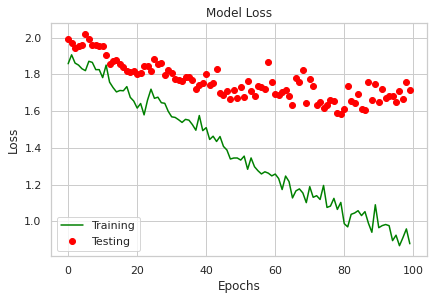

In [40]:
# Plotting Loss
plt.plot(History.history['loss'],color='green')
plt.plot(History.history['val_loss'],'bo',color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'],loc='lower left')
plt.show()

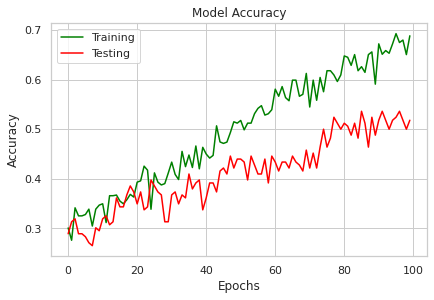

In [38]:
#Plotting accuracy
plt.plot(History.history['accuracy'],color='green')
plt.plot(History.history['val_accuracy'],color='red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'])
plt.show()

As we can see above the model is performing quite well, as the test accuracy is almost close to the training accuracy over 100 epochs. We can check for other alternate model configurations to further boost the accuracy.

In [26]:
# Predictions
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [27]:
# Segregating correctly classified and misclassified images
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])!=pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

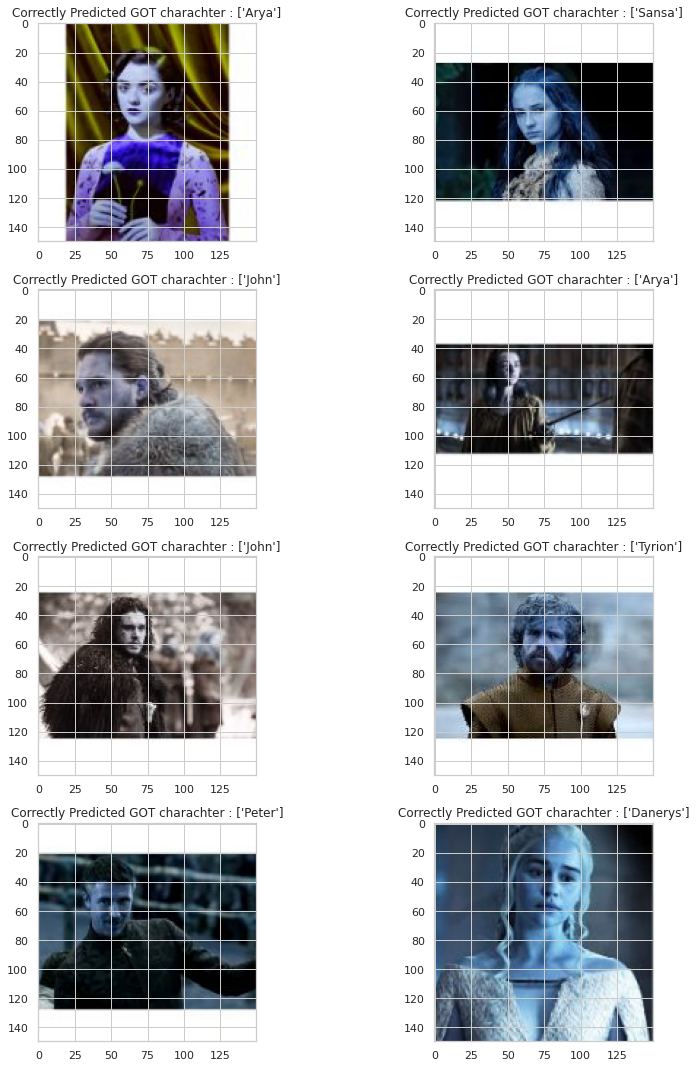

In [28]:
#Correctly classified samples
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Correctly Predicted GOT charachter : "+str(le.inverse_transform([pred_digits[prop_class[count]]])))
        plt.tight_layout()
        count+=1

We can see above samples from the set of correctly classified images. More than 50% images were classified into correct labels. Below are some of the misclassified images.We can further check use some decaying learning rate if required for better model performance or bring more data for better training of the model.

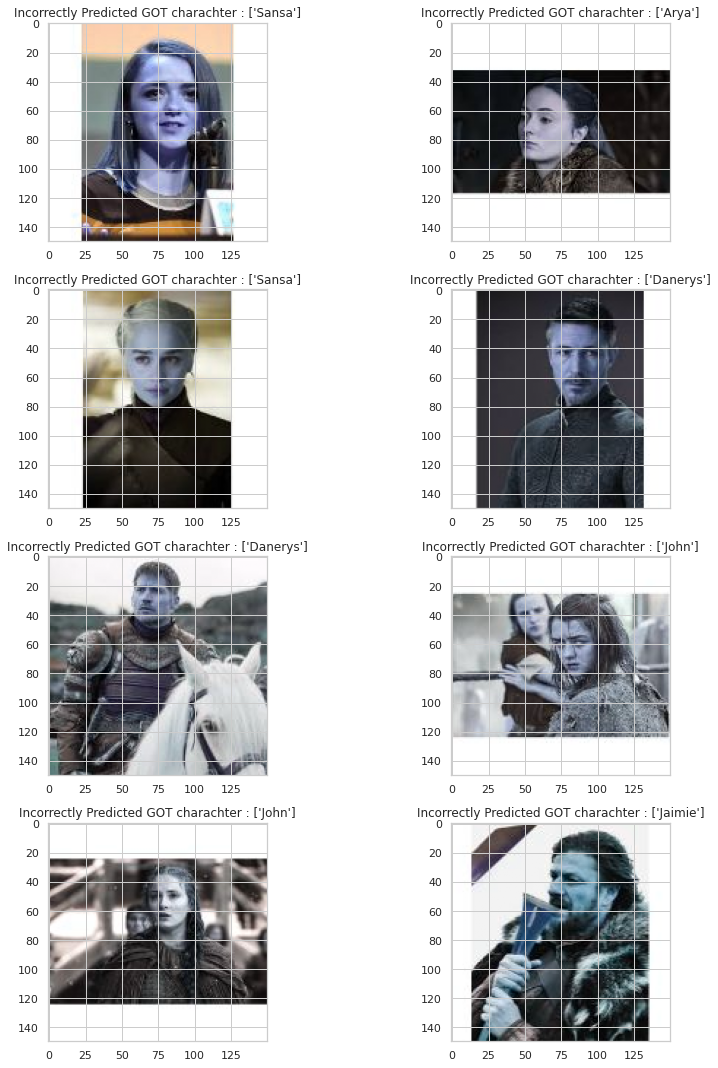

In [29]:
#Misclassified samples
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Incorrectly Predicted GOT charachter : "+str(le.inverse_transform([pred_digits[mis_class[count]]])))
        plt.tight_layout()
        count+=1

References:

Data: https://www.kaggle.com/aronighosh/game-of-thrones-character-recognition

https://www.tensorflow.org/tutorials/images/cnn

https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

https://matplotlib.org/3.1.1/index.html

https://keras.io/

https://www.tensorflow.org/guide/keras/sequential_model

https://www.kaggle.com/rajmehra03/flower-recognition-cnn-keras
